In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crime_data = pd.read_csv("Historical_Community_Safety_Data.csv")
crime_data

<ipython-input-2-7bd8ff72d5f3>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv("Historical_Community_Safety_Data.csv")


,X,Y,OBJECTID,UniqueIdentifier,occ_date,case_type_pubtrans,LocationCode,municipality,Special_grouping,Shooting,occ_id,hate_crime,case_status,occ_type
0,621587.5600,4.879784e+06,1,2016_37_1,2016/01/01 06:03:00+00,Impaired Alcohol / Over 80 Mgs,Outdoor,Newmarket,NaN,NaN,2016_37,NaN,Solved,Impaired Operation
1,632681.3500,4.853143e+06,2,2016_54_1,2016/01/01 06:21:59+00,Liquor - Intoxicated,Business,Markham,NaN,NaN,2016_54,NaN,Solved,Provincial Offences
2,630898.4900,4.907071e+06,3,2016_229_1,2016/01/01 06:14:59+00,Theft Under $5000 - Vehicle,Outdoor,Georgina,NaN,NaN,2016_229,NaN,Closed,Theft of Motor Vehicle
3,616371.2500,4.853863e+06,4,2016_249_1,2016/01/01 14:23:00+00,Assault with a Weapon,Business,Vaughan,Violent Crime,NaN,2016_249,Hate Crime,Solved,Assaults
4,616483.5600,4.854983e+06,5,2016_359_1,2016/01/01 18:07:00+00,Mischief To Property,Residence,Vaughan,NaN,NaN,2016_359,NaN,Closed,Mischief
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176989,631979.0209,4.856496e+06,461046,2022_802161_2,2020/02/15 14:00:00+00,Possession Over - Property Obtained By Crime,Business,Markham,NaN,NaN,2022_802161,NaN,Solved,Other Property Crime
176990,625902.0800,4.859534e+06,461265,2023_177839_1,2020/02/01 05:00:00+00,Fraud - Other Means,Residence,Richmond Hill,NaN,NaN,2023_177839,NaN,Open,Fraud
176991,622688.6300,4.871067e+06,461782,2023_187377_3,2018/01/01 05:00:00+00,Theft Under $5000- Other,Residence,Aurora,NaN,NaN,2023_187377,NaN,Open,Theft Under $5000
176992,610953.3300,4.853489e+06,461915,2023_806932_1,2019/12/03 05:00:00+00,Fraud - Other Means,Residence,Vaughan,NaN,NaN,2023_806932,NaN,Open,Fraud


In [3]:
crime_data.drop(['OBJECTID','UniqueIdentifier','LocationCode','Special_grouping',	'Shooting',	'occ_id','hate_crime','case_type_pubtrans'],axis=1,inplace=True)
crime_data['occ_date'] = pd.to_datetime(crime_data['occ_date'])
crime_data['occ_date'] = crime_data['occ_date'].dt.tz_convert(None)
crime_data

,X,Y,occ_date,municipality,case_status,occ_type
0,621587.5600,4.879784e+06,2016-01-01 06:03:00,Newmarket,Solved,Impaired Operation
1,632681.3500,4.853143e+06,2016-01-01 06:21:59,Markham,Solved,Provincial Offences
2,630898.4900,4.907071e+06,2016-01-01 06:14:59,Georgina,Closed,Theft of Motor Vehicle
3,616371.2500,4.853863e+06,2016-01-01 14:23:00,Vaughan,Solved,Assaults
4,616483.5600,4.854983e+06,2016-01-01 18:07:00,Vaughan,Closed,Mischief
...,...,...,...,...,...,...
176989,631979.0209,4.856496e+06,2020-02-15 14:00:00,Markham,Solved,Other Property Crime
176990,625902.0800,4.859534e+06,2020-02-01 05:00:00,Richmond Hill,Open,Fraud
176991,622688.6300,4.871067e+06,2018-01-01 05:00:00,Aurora,Open,Theft Under $5000
176992,610953.3300,4.853489e+06,2019-12-03 05:00:00,Vaughan,Open,Fraud


In [4]:
district_mapping = {
    'Aurora': 'Newmarket',
    'King': 'Newmarket',
    'East Gwillimbury':'Newmarket',
    'Newmarket':'Newmarket',
    'Richmond Hill':'Richmond Hill',
    'Georgina':'Georgina',
    'Vaughan': 'Vaughan',
    'Whitchurch-Stouffville':'Markham',
    'Markham':'Markham'
}

# Replace numbers with values using the mapping
crime_data['District'] = crime_data['municipality'].replace(district_mapping)
crime_data

,X,Y,occ_date,municipality,case_status,occ_type,District
0,621587.5600,4.879784e+06,2016-01-01 06:03:00,Newmarket,Solved,Impaired Operation,Newmarket
1,632681.3500,4.853143e+06,2016-01-01 06:21:59,Markham,Solved,Provincial Offences,Markham
2,630898.4900,4.907071e+06,2016-01-01 06:14:59,Georgina,Closed,Theft of Motor Vehicle,Georgina
3,616371.2500,4.853863e+06,2016-01-01 14:23:00,Vaughan,Solved,Assaults,Vaughan
4,616483.5600,4.854983e+06,2016-01-01 18:07:00,Vaughan,Closed,Mischief,Vaughan
...,...,...,...,...,...,...,...
176989,631979.0209,4.856496e+06,2020-02-15 14:00:00,Markham,Solved,Other Property Crime,Markham
176990,625902.0800,4.859534e+06,2020-02-01 05:00:00,Richmond Hill,Open,Fraud,Richmond Hill
176991,622688.6300,4.871067e+06,2018-01-01 05:00:00,Aurora,Open,Theft Under $5000,Newmarket
176992,610953.3300,4.853489e+06,2019-12-03 05:00:00,Vaughan,Open,Fraud,Vaughan


In [5]:
crime_data['District'].unique()

array(['Newmarket', 'Markham', 'Georgina', 'Vaughan', 'Richmond Hill'],
      dtype=object)

In [6]:
crime_data.to_csv('updated_crime_data.csv')

In [6]:
calls_for_service_data = pd.read_excel('Calls for Service 2020 to 2022.xlsx')
calls_for_service_data


,Call Date,Call Time (HH:MM:SS),District,YRP,Call Type
0,20200101,14:49:10,1,11,ADVISED 911 CALL
1,20200107,03:14:28,2,22,TOW BYLAW & SPECIAL CONSTABLE
2,20200107,04:27:04,2,21,TOW BYLAW & SPECIAL CONSTABLE
3,20200107,04:47:35,1,11,ADVISED 911 CALL
4,20200107,05:02:39,5,52,ADVISED 911 CALL
...,...,...,...,...,...
748346,20220909,10:03:58,4,43,MVC PROPERTY DAMAGE
748347,20220906,14:27:29,5,53,ARU HARASSMENT (PHONE CALLS)
748348,20220909,06:17:37,1,14,VITAL SIGNS ABSENT
748349,20220909,12:42:56,2,23,ASSIST P.O. OR OTHER AGENCY


In [7]:
calls_for_service_data['District'].unique()
calls_for_service_data = calls_for_service_data.loc[~(calls_for_service_data['District']=="~")]
calls_for_service_data

,Call Date,Call Time (HH:MM:SS),District,YRP,Call Type
0,20200101,14:49:10,1,11,ADVISED 911 CALL
1,20200107,03:14:28,2,22,TOW BYLAW & SPECIAL CONSTABLE
2,20200107,04:27:04,2,21,TOW BYLAW & SPECIAL CONSTABLE
3,20200107,04:47:35,1,11,ADVISED 911 CALL
4,20200107,05:02:39,5,52,ADVISED 911 CALL
...,...,...,...,...,...
748346,20220909,10:03:58,4,43,MVC PROPERTY DAMAGE
748347,20220906,14:27:29,5,53,ARU HARASSMENT (PHONE CALLS)
748348,20220909,06:17:37,1,14,VITAL SIGNS ABSENT
748349,20220909,12:42:56,2,23,ASSIST P.O. OR OTHER AGENCY


In [8]:
calls_for_service_data['Call Date'] = pd.to_datetime(calls_for_service_data['Call Date'], format='%Y%m%d')
calls_for_service_data['occ_date'] = calls_for_service_data['Call Date'].dt.strftime('%Y-%m-%d') + ' ' + calls_for_service_data['Call Time (HH:MM:SS)'].astype(str)
calls_for_service_data['occ_date'] = pd.to_datetime(calls_for_service_data['occ_date'])
district_mapping = {
    1: 'Newmarket',
    2: 'Richmond Hill',
    3:'Georgina',
    4:'Vaughan',
    5:'Markham'
}

# Replace numbers with values using the mapping
calls_for_service_data['District'] = calls_for_service_data['District'].replace(district_mapping)

calls_for_service_data


<ipython-input-8-46d9e32dc55e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_for_service_data['Call Date'] = pd.to_datetime(calls_for_service_data['Call Date'], format='%Y%m%d')
<ipython-input-8-46d9e32dc55e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_for_service_data['occ_date'] = calls_for_service_data['Call Date'].dt.strftime('%Y-%m-%d') + ' ' + calls_for_service_data['Call Time (HH:MM:SS)'].astype(str)
<ipython-input-8-46d9e32dc55e>:3: SettingWithCopyWarning: 
A value is trying to b

,Call Date,Call Time (HH:MM:SS),District,YRP,Call Type,occ_date
0,2020-01-01,14:49:10,Newmarket,11,ADVISED 911 CALL,2020-01-01 14:49:10
1,2020-01-07,03:14:28,Richmond Hill,22,TOW BYLAW & SPECIAL CONSTABLE,2020-01-07 03:14:28
2,2020-01-07,04:27:04,Richmond Hill,21,TOW BYLAW & SPECIAL CONSTABLE,2020-01-07 04:27:04
3,2020-01-07,04:47:35,Newmarket,11,ADVISED 911 CALL,2020-01-07 04:47:35
4,2020-01-07,05:02:39,Markham,52,ADVISED 911 CALL,2020-01-07 05:02:39
...,...,...,...,...,...,...
748346,2022-09-09,10:03:58,Vaughan,43,MVC PROPERTY DAMAGE,2022-09-09 10:03:58
748347,2022-09-06,14:27:29,Markham,53,ARU HARASSMENT (PHONE CALLS),2022-09-06 14:27:29
748348,2022-09-09,06:17:37,Newmarket,14,VITAL SIGNS ABSENT,2022-09-09 06:17:37
748349,2022-09-09,12:42:56,Richmond Hill,23,ASSIST P.O. OR OTHER AGENCY,2022-09-09 12:42:56


In [10]:
calls_for_service_data.to_csv("preprocessed_calls_service_data.csv")

In [9]:
district_staffing = pd.read_excel('4 District Platoon Staffing Exceptions 2020 to 2022.xlsx')
district_staffing['Exception Date'] = pd.to_datetime(district_staffing['Exception Date'], format='%Y%m%d')
district_staffing.to_csv("preprocessed_staffing_exceptions.csv")
district_mapping = {
    '4 District A Platoon': 'Vaughan',
    '4 District B Platoon': 'Vaughan',
    '4 District C Platoon': 'Vaughan',
    '4 District D Platoon': 'Vaughan'

}

# Replace numbers with values using the mapping
district_staffing['District'] = district_staffing['Platoon'].replace(district_mapping)

district_staffing

,Platoon,Officer Badge #,Exception Date,Exception Start Time,# of Hours,Exception Type,District
0,4 District B Platoon,34260,2020-02-27,07:00:00,12.0,Vacation,Vaughan
1,4 District B Platoon,34260,2020-02-20,07:00:00,10.0,Training,Vaughan
2,4 District B Platoon,34260,2020-02-19,07:00:00,10.0,Training,Vaughan
3,4 District B Platoon,34260,2020-03-07,07:00:00,12.0,Sick,Vaughan
4,4 District B Platoon,34260,2020-02-28,07:00:00,12.0,Vacation,Vaughan
...,...,...,...,...,...,...,...
28369,4 District C Platoon,38160,2022-12-22,18:00:00,12.0,Sick,Vaughan
28370,4 District D Platoon,37350,2022-12-22,07:00:00,12.0,Vacation,Vaughan
28371,4 District D Platoon,37350,2022-12-30,07:00:00,6.0,Vacation,Vaughan
28372,4 District D Platoon,37350,2022-12-31,19:00:00,12.0,Vacation,Vaughan


In [10]:
crime_data['Date'] = crime_data['occ_date'].dt.date

In [11]:
crime_data

,X,Y,occ_date,municipality,case_status,occ_type,District,Date
0,621587.5600,4.879784e+06,2016-01-01 06:03:00,Newmarket,Solved,Impaired Operation,Newmarket,2016-01-01
1,632681.3500,4.853143e+06,2016-01-01 06:21:59,Markham,Solved,Provincial Offences,Markham,2016-01-01
2,630898.4900,4.907071e+06,2016-01-01 06:14:59,Georgina,Closed,Theft of Motor Vehicle,Georgina,2016-01-01
3,616371.2500,4.853863e+06,2016-01-01 14:23:00,Vaughan,Solved,Assaults,Vaughan,2016-01-01
4,616483.5600,4.854983e+06,2016-01-01 18:07:00,Vaughan,Closed,Mischief,Vaughan,2016-01-01
...,...,...,...,...,...,...,...,...
176989,631979.0209,4.856496e+06,2020-02-15 14:00:00,Markham,Solved,Other Property Crime,Markham,2020-02-15
176990,625902.0800,4.859534e+06,2020-02-01 05:00:00,Richmond Hill,Open,Fraud,Richmond Hill,2020-02-01
176991,622688.6300,4.871067e+06,2018-01-01 05:00:00,Aurora,Open,Theft Under $5000,Newmarket,2018-01-01
176992,610953.3300,4.853489e+06,2019-12-03 05:00:00,Vaughan,Open,Fraud,Vaughan,2019-12-03


In [12]:
crime_data['Date'] = pd.to_datetime(crime_data['Date'])
crime_data.dtypes

X                      float64
Y                      float64
occ_date        datetime64[ns]
municipality            object
case_status             object
occ_type                object
District                object
Date            datetime64[ns]
dtype: object

In [ ]:
calls_data = calls_for_service_data
leaves_data = district_staffing

<ipython-input-28-470207fd4f90>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_data['Call Date'] = pd.to_datetime(calls_data['Call Date'])


,Date,District,Call Count
0,2020-01-01,Georgina,224
1,2020-01-01,Markham,4158
2,2020-01-01,Newmarket,17550
3,2020-01-01,Richmond Hill,5280
4,2020-01-01,Vaughan,6006
...,...,...,...
1821,2020-12-31,Richmond Hill,395
1822,2020-12-31,Vaughan,1900
1823,2021-01-01,Markham,100
1824,2021-01-01,Newmarket,572


,Date,District,Call Count,Crime Count
0,2020-01-01,Georgina,224,14
1,2020-01-01,Markham,4158,66
2,2020-01-01,Newmarket,17550,54
3,2020-01-01,Richmond Hill,5280,60
4,2020-01-01,Vaughan,6006,77
...,...,...,...,...
1821,2020-12-31,Richmond Hill,395,5
1822,2020-12-31,Vaughan,1900,20
1823,2021-01-01,Markham,100,2
1824,2021-01-01,Newmarket,572,2


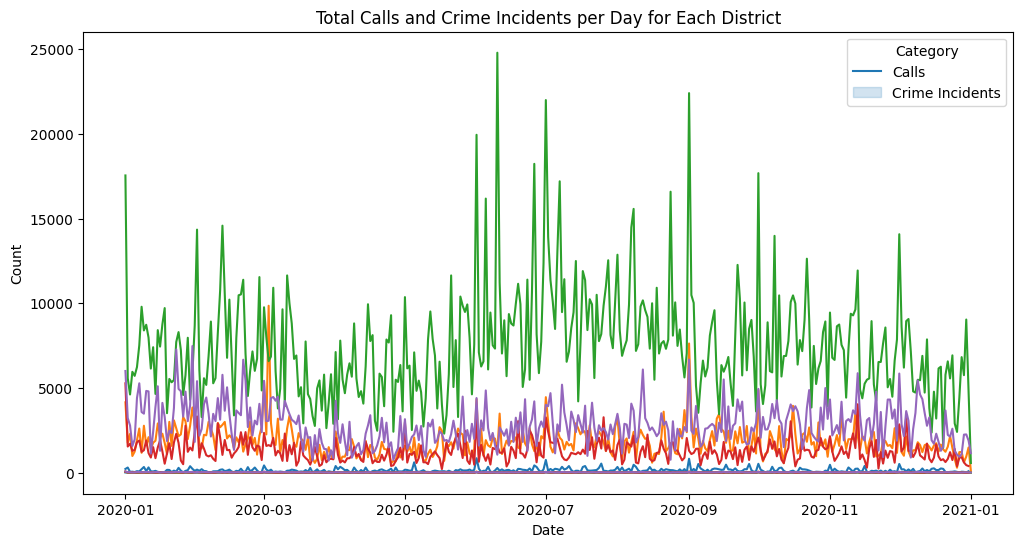

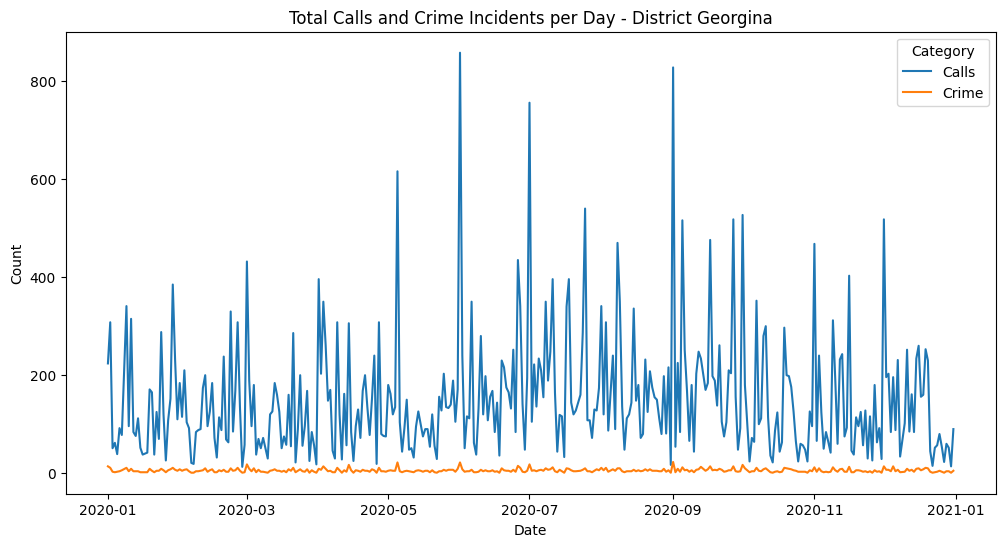

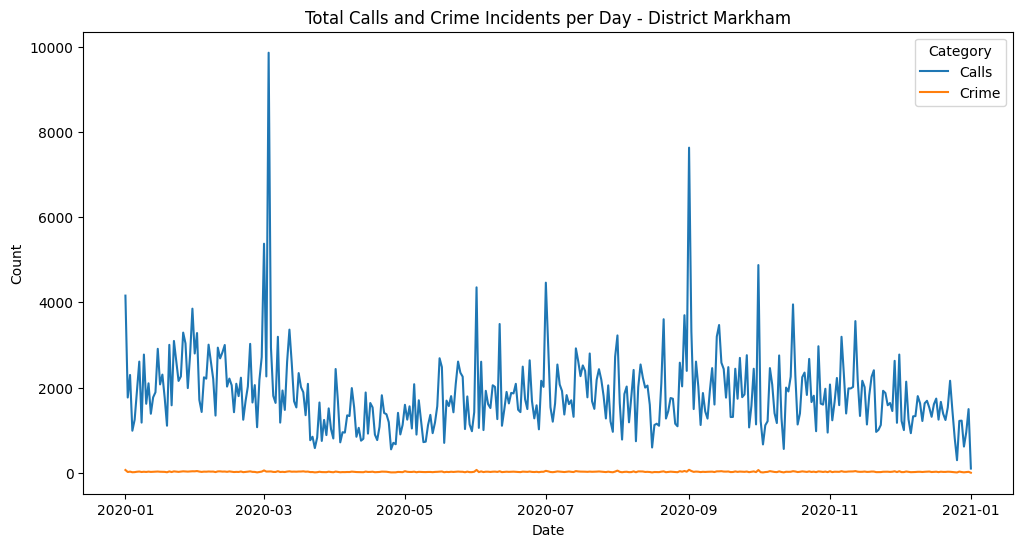

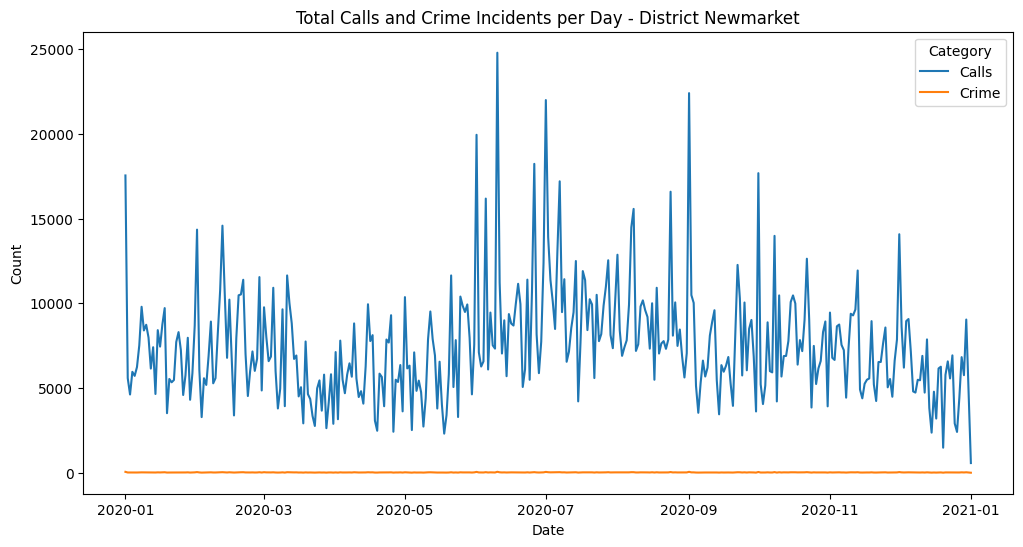

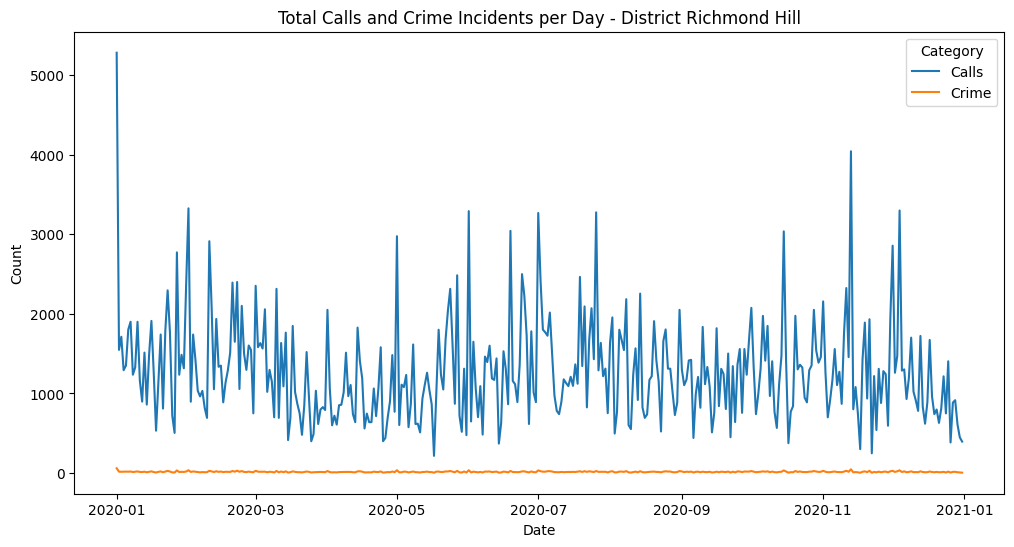

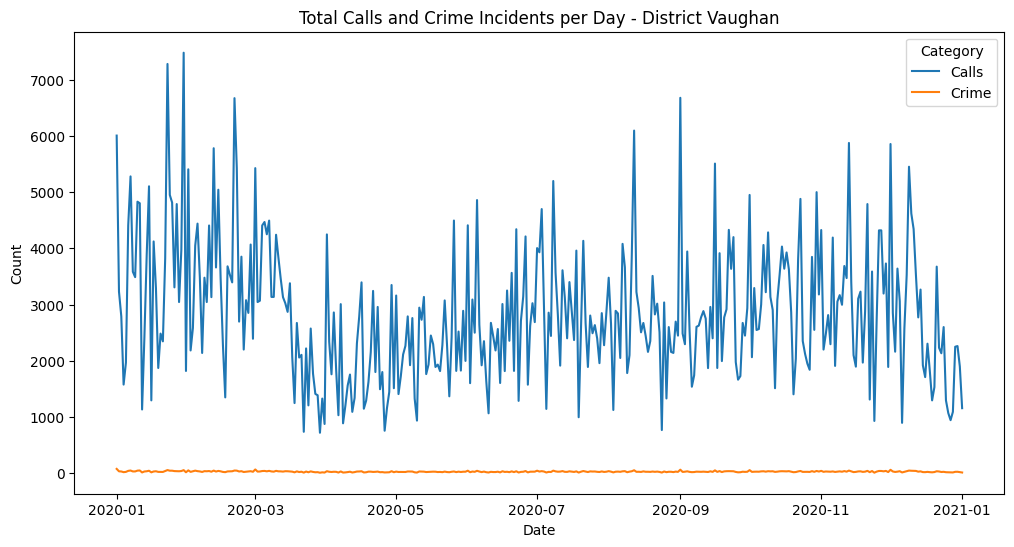

In [28]:
# Assuming you have loaded data into DataFrames named calls_data and crime_data.

# Data Cleaning and Preprocessing (if required)
# Convert 'occ_date' to datetime format for both datasets
calls_data['Call Date'] = pd.to_datetime(calls_data['Call Date'])
crime_data['Date'] = pd.to_datetime(crime_data['Date'])

# Merge the datasets based on 'occ_date' and 'District'
merged_data = pd.merge(calls_data, crime_data, left_on=['Call Date', 'District'],right_on=['Date','District'], how='inner')

# Data Analysis and Visualization
# Plot the total calls and crime incidents per day for each District

# Calculate total calls and crime incidents per day for each District
grouped_data = merged_data.groupby(['Date', 'District']).size().reset_index(name='Call Count')
display(grouped_data)
grouped_data = grouped_data.merge(crime_data.groupby(['Date', 'District']).size().reset_index(name='Crime Count'), on=['Date', 'District'], how='inner')
display(grouped_data)

# Data Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Date', y='Call Count', hue='District')
sns.lineplot(data=grouped_data, x='Date', y='Crime Count', hue='District')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total Calls and Crime Incidents per Day for Each District')
plt.legend(title='Category', labels=['Calls', 'Crime Incidents'])
plt.show()

for district, data in grouped_data.groupby('District'):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x='Date', y='Call Count', label='Calls')
    sns.lineplot(data=data, x='Date', y='Crime Count', label='Crime')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Total Calls and Crime Incidents per Day - District {district}')
    plt.legend(title='Category')
    plt.show()

<ipython-input-28-4912194f70ca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_data['occ_date'] = pd.to_datetime(calls_data['occ_date'])


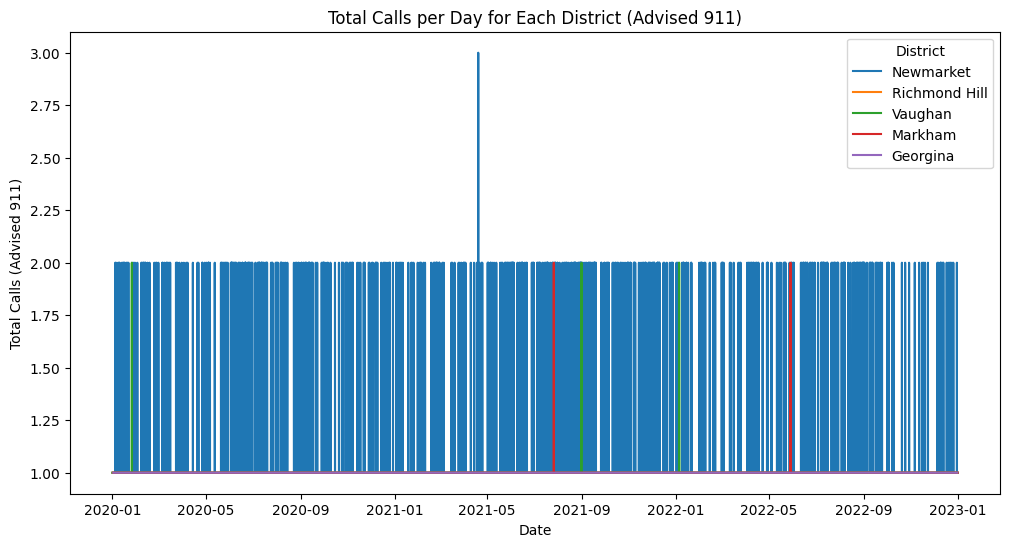

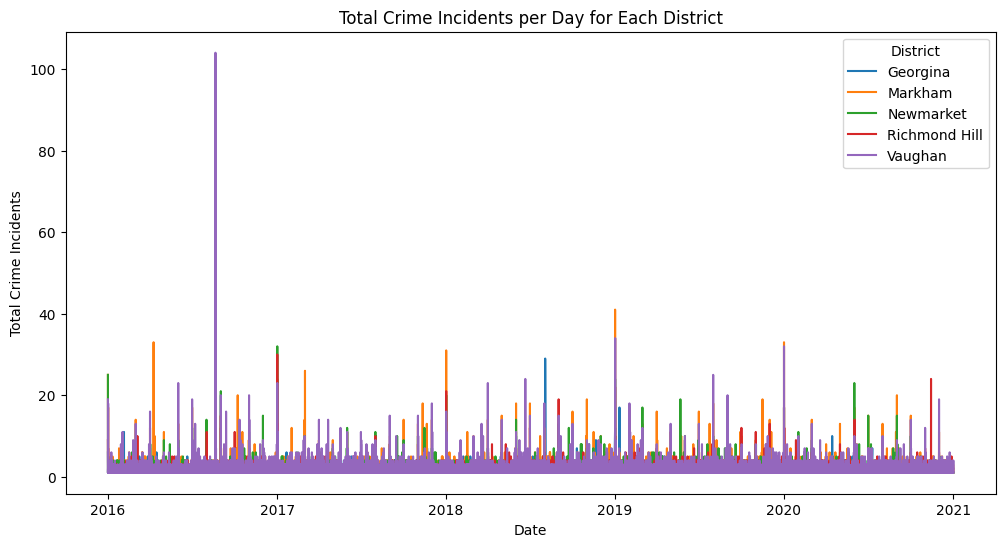

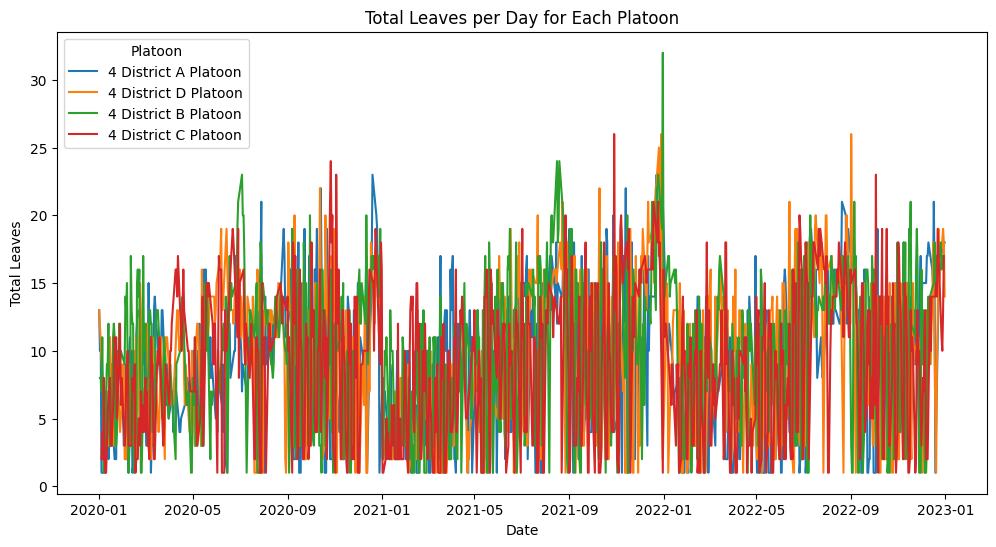

In [28]:


# Assuming you have loaded data into DataFrames named calls_data, crime_data, and leaves_data.

# Data Cleaning and Preprocessing (if required)
# Check for missing values, duplicates, and inconsistencies in each DataFrame.

# Convert 'occ_date' and 'Exception Date' to datetime format
calls_data['occ_date'] = pd.to_datetime(calls_data['occ_date'])
crime_data['occ_date'] = pd.to_datetime(crime_data['occ_date'])
leaves_data['Exception Date'] = pd.to_datetime(leaves_data['Exception Date'])

# 1. Calls for Service Demand in 4 District
# Filter calls where no officer is dispatched (Call Type Advised 911)
calls_no_officer_dispatched = calls_data[calls_data['Call Type'] == 'ADVISED 911 CALL']

# Group calls data by 'occ_date', 'District', and count the number of calls per day
calls_by_day_district = calls_no_officer_dispatched.groupby(['occ_date', 'District']).size().reset_index(name='Call Count')

# Data Visualization for Calls
# Plot the total calls per day for each District
plt.figure(figsize=(12, 6))
sns.lineplot(data=calls_by_day_district, x='occ_date', y='Call Count', hue='District')
plt.xlabel('Date')
plt.ylabel('Total Calls (Advised 911)')
plt.title('Total Calls per Day for Each District (Advised 911)')
plt.legend(title='District')
plt.show()

# 2. Historical Crime Incidents in 4 District
# Group crime data by 'occ_date', 'District', and count the number of crime incidents per day
crime_by_day_district = crime_data.groupby(['occ_date', 'District']).size().reset_index(name='Crime Count')

# Data Visualization for Crime Incidents
# Plot the total crime incidents per day for each District
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_by_day_district, x='occ_date', y='Crime Count', hue='District')
plt.xlabel('Date')
plt.ylabel('Total Crime Incidents')
plt.title('Total Crime Incidents per Day for Each District')
plt.legend(title='District')
plt.show()

# 3. Leaves Data for 4 District
# Group leaves data by 'Exception Date', 'Platoon', and count the number of leaves per day
leaves_by_day_platoon = leaves_data.groupby(['Exception Date', 'Platoon']).size().reset_index(name='Leave Count')

# Data Visualization for Leaves
# Plot the total leaves per day for each Platoon
plt.figure(figsize=(12, 6))
sns.lineplot(data=leaves_by_day_platoon, x='Exception Date', y='Leave Count', hue='Platoon')
plt.xlabel('Date')
plt.ylabel('Total Leaves')
plt.title('Total Leaves per Day for Each Platoon')
plt.legend(title='Platoon')
plt.show()





<ipython-input-42-d2e80b21ae91>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_data['occ_date'] = pd.to_datetime(calls_data['occ_date'])
<ipython-input-42-d2e80b21ae91>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_data['Year'] = calls_data['occ_date'].dt.year
<ipython-input-42-d2e80b21ae91>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,Year,Month,District,Call Count,Crime Count,Leave Count,Total Incidents
0,2020,1,Georgina,40.0,167.0,0.0,207.0
1,2020,1,Markham,266.0,835.0,0.0,1101.0
2,2020,1,Newmarket,8301.0,618.0,0.0,8919.0
3,2020,1,Richmond Hill,283.0,542.0,0.0,825.0
4,2020,1,Vaughan,135.0,1115.0,578.0,1828.0
...,...,...,...,...,...,...,...
415,2019,12,Georgina,0.0,127.0,0.0,127.0
416,2019,12,Markham,0.0,779.0,0.0,779.0
417,2019,12,Newmarket,0.0,574.0,0.0,574.0
418,2019,12,Richmond Hill,0.0,479.0,0.0,479.0


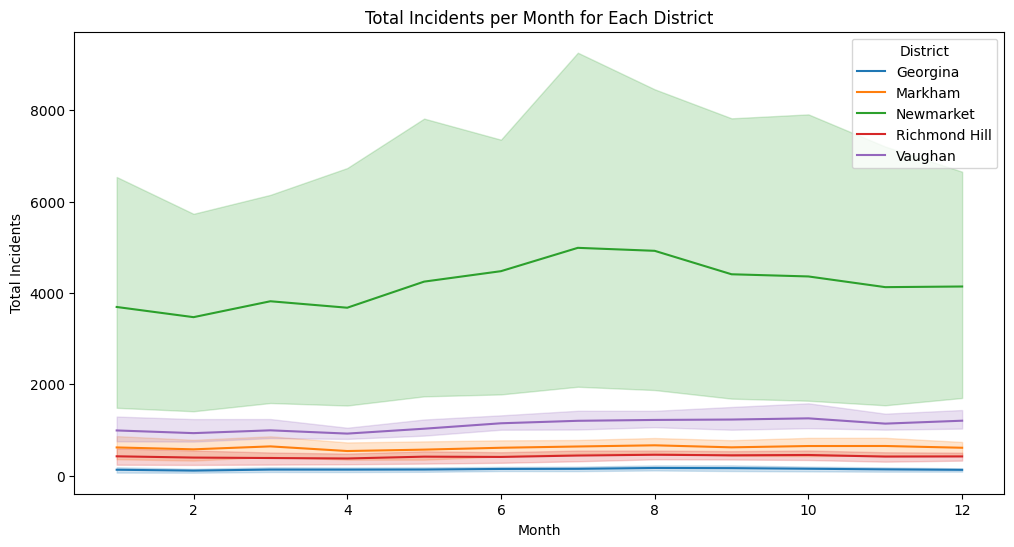

In [42]:
import pandas as pd

# Assuming you have loaded data into DataFrames named calls_data, crime_data, and leaves_data.

# Data Cleaning and Preprocessing (if required)
# Check for missing values, duplicates, and inconsistencies in each DataFrame.

# Calls for Service Demand in 4 District
calls_data = calls_data.loc[calls_data['Call Type']=="ADVISED 911 CALL"]

calls_data['occ_date'] = pd.to_datetime(calls_data['occ_date'])



calls_data['Year'] = calls_data['occ_date'].dt.year
calls_data['Month'] = calls_data['occ_date'].dt.month

# Group calls data by 'Year', 'Month', and 'District' and count the number of calls per month
calls_by_month = calls_data.groupby(['Year', 'Month', 'District']).size().reset_index(name='Call Count')

# Historical Crime Incidents in 4 District
crime_data['occ_date'] = pd.to_datetime(crime_data['occ_date'])

# Group crime data by District and count the number of crime incidents per month
crime_data['Year'] = crime_data['occ_date'].dt.year
crime_data['Month'] = crime_data['occ_date'].dt.month

# Group crime data by 'Year', 'Month', and 'municipality' and count the number of crime incidents per month
crime_by_month = crime_data.groupby(['Year', 'Month', 'District']).size().reset_index(name='Crime Count')

# Scheduling Data of Leaves Provided for 4 District
leaves_data['Exception Date'] = pd.to_datetime(leaves_data['Exception Date'])

# Create new columns for year and month from 'Exception Date'
leaves_data['Year'] = leaves_data['Exception Date'].dt.year
leaves_data['Month'] = leaves_data['Exception Date'].dt.month

# Group leaves data by 'Year', 'Month', and 'Platoon' and count the number of leaves per month
leaves_by_month = leaves_data.groupby(['Year', 'Month', 'District']).size().reset_index(name='Leave Count')

# Merging the DataFrames to Analyze Together
# Merge the calls_by_month, crime_by_month, and leaves_by_month DataFrames
merge1 = pd.merge(calls_by_month, crime_by_month, left_on=['Year', 'Month', 'District'], right_on=['Year', 'Month', 'District'], how='outer')
merged_data = pd.merge(merge1, leaves_by_month, left_on=['Year', 'Month', 'District'], right_on=['Year', 'Month', 'District'], how='outer')

# Fill NaN values with 0
merged_data.fillna(0, inplace=True)

# Calculate the total incidents (calls + crime + leaves) per month for each District
merged_data['Total Incidents'] = merged_data['Call Count'] + merged_data['Crime Count'] + merged_data['Leave Count']
display(merged_data)
# Data Visualization
# Plot the total incidents per month for each District
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='Month', y='Total Incidents', hue='District')
plt.xlabel('Month')
plt.ylabel('Total Incidents')
plt.title('Total Incidents per Month for Each District')
plt.legend(title='District')
plt.show()


Convert timestamps to datetime format and preprocess data, if necessary.
Group calls for service data and crime data by District and count the number of incidents per month.
Group leaves data by District and count the number of leaves per month.
Merge the DataFrames to analyze the calls for service demand, historical crime incidents, and leaves data together.
Fill any NaN values with 0 to ensure consistent data.
Calculate the total incidents (calls + crime + leaves) per month for each District.
Visualize the total incidents per month for each District using a line plot.
The line plot will show the trends and variations in total incidents (calls, crime, and leaves) over time for each District. By analyzing this plot, you can identify potential future scheduling challenges based on increases or decreases in incidents. For example, if there are significant spikes in total incidents for a District in certain months, it may indicate a higher demand for staff or potential scheduling challenges during those periods. Similarly, if leaves are more frequent in certain months, it may require additional staffing adjustments to maintain adequate coverage.